https://www.apuestafutbol.net/estrategia/apuestas-totales-con-handicap-asiatico.html

In [373]:
import os
import glob

import pandas as pd
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 80)

import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 8)

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict, GridSearchCV

import seaborn as sns

In [374]:
path = 'data/'
csv_files = glob.glob(os.path.join(path, "*.csv"))

df_from_file = (pd.read_csv(f, sep=',') for f in csv_files)
df_football = pd.concat(df_from_file, ignore_index = True)

df_football.head()

,AC,AF,AR,AS,AST,AY,AwayTeam,B365A,B365D,B365H,BSA,BSD,BSH,BWA,BWD,BWH,Bb1X2,BbAH,BbAHh,BbAv<2.5,BbAv>2.5,BbAvA,BbAvAHA,BbAvAHH,BbAvD,BbAvH,BbMx<2.5,BbMx>2.5,BbMxA,BbMxAHA,BbMxAHH,BbMxD,BbMxH,BbOU,Date,Div,FTAG,FTHG,FTR,GBA,GBD,GBH,HC,HF,HR,HS,HST,HTAG,HTHG,HTR,HY,HomeTeam,IWA,IWD,IWH,LBA,LBD,LBH,PSA,PSCA,PSCD,PSCH,PSD,PSH,Referee,SBA,SBD,SBH,SJA,SJD,SJH,VCA,VCD,VCH,WHA,WHD,WHH
0,9.0,9.0,0.0,16.0,6.0,0.0,Malaga,3.2,3.25,2.25,3.0,3.30,2.30,3.25,3.40,2.25,38.0,21.0,-0.25,1.78,2.02,3.15,1.91,1.96,3.26,2.28,1.83,2.12,3.45,1.98,1.99,3.44,2.40,34.0,18/08/12,SP1,1.0,0.0,A,3.25,3.40,2.25,8.0,13.0,0.0,17.0,3.0,0.0,0.0,D,2.0,Celta,2.7,3.2,2.40,2.88,3.20,2.38,3.43,3.29,3.45,2.35,3.38,2.31,NaN,NaN,NaN,NaN,3.00,3.25,2.40,3.40,3.3,2.30,3.2,3.30,2.25
1,4.0,14.0,0.0,13.0,5.0,2.0,Espanol,3.8,3.30,2.00,3.6,3.25,2.05,4.10,3.30,2.00,38.0,20.0,-0.50,1.68,2.17,3.78,1.90,1.98,3.36,2.00,1.72,2.30,4.25,1.95,2.01,3.57,2.10,32.0,18/08/12,SP1,1.0,2.0,H,4.10,3.30,2.00,7.0,14.0,0.0,17.0,9.0,1.0,1.0,D,3.0,Mallorca,3.2,3.2,2.10,3.30,3.25,2.10,4.17,3.63,3.33,2.25,3.56,2.00,NaN,NaN,NaN,NaN,3.75,3.25,2.10,4.10,3.5,2.00,3.8,3.25,2.05
2,8.0,17.0,0.0,10.0,3.0,4.0,Getafe,5.5,3.75,1.62,5.0,3.60,1.70,5.50,3.75,1.60,38.0,23.0,-0.75,1.84,1.96,5.33,2.05,1.82,3.72,1.65,1.92,2.04,6.00,2.12,1.90,4.08,1.70,34.0,18/08/12,SP1,1.0,2.0,H,5.50,3.75,1.60,8.0,15.0,0.0,16.0,5.0,0.0,2.0,H,4.0,Sevilla,4.4,3.5,1.70,4.50,3.60,1.70,6.15,5.73,3.96,1.68,3.94,1.65,NaN,NaN,NaN,NaN,5.50,3.60,1.67,6.00,3.8,1.67,4.8,3.75,1.70
3,4.0,17.0,0.0,13.0,9.0,2.0,Betis,4.2,3.50,1.83,4.2,3.50,1.83,4.10,3.50,1.85,38.0,18.0,-0.75,1.92,1.88,4.18,1.76,2.12,3.54,1.85,2.00,2.00,4.50,1.81,2.18,3.83,1.91,34.0,19/08/12,SP1,5.0,3.0,A,4.10,3.50,1.85,11.0,12.0,0.0,17.0,8.0,3.0,0.0,A,2.0,Ath Bilbao,4.0,3.4,1.80,4.20,3.50,1.85,4.41,3.65,3.49,2.17,3.77,1.89,NaN,NaN,NaN,NaN,4.50,3.50,1.83,4.33,3.7,1.87,4.0,3.50,1.91
4,1.0,12.0,0.0,5.0,2.0,3.0,Sociedad,26.0,9.00,1.10,21.0,9.00,1.10,23.00,10.00,1.08,35.0,23.0,-2.75,3.36,1.30,24.64,1.93,1.93,9.77,1.09,3.65,1.33,34.00,1.99,1.98,13.00,1.12,23.0,19/08/12,SP1,1.0,5.0,H,23.00,10.00,1.08,9.0,9.0,0.0,18.0,10.0,1.0,4.0,H,2.0,Barcelona,14.0,7.0,1.12,17.00,8.00,1.11,31.00,35.36,13.96,1.09,12.00,1.10,NaN,NaN,NaN,NaN,29.00,9.00,1.10,31.00,12.0,1.10,29.0,11.00,1.07


In [375]:
df_football['Date'] = pd.to_datetime(df_football['Date'])
df_football['FTTG'] = df_football['FTHG'] + df_football['FTAG']

In [376]:
variables_to_remove = ['Bb1X2', 'BbOU', 'BbAH', 'BbAHh', 
                       'BbMxAHH', 'BbMxAHA', 'BbAvAHH', 'BbAvAHA']

df_football = df_football.drop(variables_to_remove, axis=1)
df_football.shape

(13650, 70)

In [377]:
df_football.columns

Index(['AC', 'AF', 'AR', 'AS', 'AST', 'AY', 'AwayTeam', 'B365A', 'B365D',
       'B365H', 'BSA', 'BSD', 'BSH', 'BWA', 'BWD', 'BWH', 'BbAv<2.5',
       'BbAv>2.5', 'BbAvA', 'BbAvD', 'BbAvH', 'BbMx<2.5', 'BbMx>2.5', 'BbMxA',
       'BbMxD', 'BbMxH', 'Date', 'Div', 'FTAG', 'FTHG', 'FTR', 'GBA', 'GBD',
       'GBH', 'HC', 'HF', 'HR', 'HS', 'HST', 'HTAG', 'HTHG', 'HTR', 'HY',
       'HomeTeam', 'IWA', 'IWD', 'IWH', 'LBA', 'LBD', 'LBH', 'PSA', 'PSCA',
       'PSCD', 'PSCH', 'PSD', 'PSH', 'Referee', 'SBA', 'SBD', 'SBH', 'SJA',
       'SJD', 'SJH', 'VCA', 'VCD', 'VCH', 'WHA', 'WHD', 'WHH', 'FTTG'],
      dtype='object')

# Conociendo y preparando los datos

In [378]:
df_football.describe()

,AC,AF,AR,AS,AST,AY,B365A,B365D,B365H,BSA,BSD,BSH,BWA,BWD,BWH,BbAv<2.5,BbAv>2.5,BbAvA,BbAvD,BbAvH,BbMx<2.5,BbMx>2.5,BbMxA,BbMxD,BbMxH,FTAG,FTHG,GBA,GBD,GBH,HC,HF,HR,HS,HST,HTAG,HTHG,HY,IWA,IWD,IWH,LBA,LBD,LBH,PSA,PSCA,PSCD,PSCH,PSD,PSH,SBA,SBD,SBH,SJA,SJD,SJH,VCA,VCD,VCH,WHA,WHD,WHH,FTTG
count,11863.000000,11861.000000,11863.000000,11863.000000,11863.000000,11863.000000,13636.000000,13636.000000,13636.000000,4127.000000,4127.000000,4127.000000,13632.000000,13632.000000,13632.000000,13636.000000,13637.000000,13638.000000,13638.000000,13638.000000,13636.000000,13637.00000,13638.000000,13638.000000,13638.000000,13639.000000,13639.000000,4120.000000,4120.000000,4120.000000,11863.000000,11861.000000,11863.000000,11863.000000,11863.000000,13636.000000,13636.000000,11862.000000,13597.000000,13597.000000,13597.000000,13616.000000,13616.000000,13616.000000,11540.000000,11568.000000,11568.000000,11568.000000,11540.000000,11540.000000,2063.000000,2063.000000,2063.000000,6391.000000,6391.000000,6391.000000,13633.000000,13633.000000,13633.000000,13632.000000,13632.000000,13632.000000,13639.000000
mean,4.481834,13.886519,0.135379,11.229031,4.057827,2.164124,4.846709,3.963928,2.751831,4.478522,3.733998,2.542469,4.649639,3.897224,2.697385,1.953999,1.937068,4.778250,3.911916,2.726714,2.063149,2.03340,5.580003,4.252211,2.966289,1.158809,1.540216,4.483400,3.735379,2.548949,5.757397,13.450215,0.100059,14.031021,5.101745,0.502933,0.684072,1.885264,4.316904,3.748695,2.590317,4.703662,3.858952,2.683074,5.191364,5.294952,4.229890,2.900566,4.183616,2.893685,4.570337,3.727910,2.576122,4.695530,3.825437,2.620016,5.160447,4.072567,2.828925,4.739087,3.756525,2.723911,2.699025
std,2.597806,4.479231,0.370304,4.554941,2.420239,1.372019,4.276676,1.380454,2.096573,3.368888,0.998581,1.639268,3.928506,1.292339,1.947996,0.439769,0.304146,4.248944,1.327856,2.034664,0.506146,0.33612,6.072486,1.806156,2.533058,1.153176,1.308250,3.337034,1.020388,1.661429,3.019911,4.395842,0.317562,5.225521,2.783302,0.717372,0.832551,1.319944,3.347600,1.014736,1.710205,4.290736,1.270260,1.958896,4.892646,5.271072,1.806885,2.401117,1.701409,2.384200,3.653762,1.102862,1.806678,3.992434,1.146448,1.820585,5.106541,1.546223,2.267847,4.208453,1.170096,1.975768,1.679642
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.080000,1.730000,1.020000,1.140000,1.730000,1.050000,1.090000,1.670000,1.030000,1.370000,1.090000,1.090000,1.750000,1.030000,1.410000,1.13000,1.100000,1.830000,1.050000,0.000000,0.000000,1.120000,1.670000,1.050000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.100000,1.600000,1.030000,1.060000,1.830000,1.040000,1.090000,1.080000,2.200000,1.040000,2.200000,1.040000,1.111000,2.100000,1.040000,1.130000,1.800000,1.050000,1.080000,2.000000,1.030000,1.080000,1.020000,1.020000,0.000000
25%,3.000000,11.000000,0.000000,8.000000,2.000000,1.000000,2.500000,3.250000,1.670000,2.600000,3.250000,1.700000,2.550000,3.250000,1.700000,1.670000,1.720000,2.520000,3.240000,1.690000,1.750000,1.80000,2.650000,3.400000,1.750000,0.000000,1.000000,2.600000,3.200000,1.700000,4.000000,10.000000,0.000000,10.000000,3.000000,0.000000,0.000000,1.000000,2.500000,3.200000,1.700000,2.500000,3.250000,1.670000,2.590000,2.580000,3.350000,1.700000,3.360000,1.710000,2.600000,3.200000,1.666000,2.600000,3.250000,1.670000,2.600000,3.300000,1.700000,2.600000,3.200000,1.700000,1.000000
50%,4.000000,14.000000,0.000000,11.000000,4.000000,2.000000,3.500000,3.500000,2.150000,3.400000,3.400000,2.100000,3.400000,3.400000,2.150000,1.840000,1.950000,3.470000,3.430000,2.150000,1.930000,2.04000,3.770000,3.630000,2.250000,1.000000,1.000000,3.500000,3.400000,2.100000,5.000000,13.000000,0.000000,14.000000,5.000000,0.000000,0.000000,2.000000,3.300000,3.400000,2.100000,3.400000,3.400000,2.150000,3.670000,3.660000,3.610000,2.220000,3.600000,2.200000,3.400000,3.400000,2.100000,3.500000,3.400000,2.100000,3.600000,3.500000,2.200000,3.400000,3.300000,2.200000,3.000000
75%,6.000000,17.000000,0.000000,14.00

In [379]:
null_data = df_football.isnull().mean()

Text(0.5,0,'percentage')

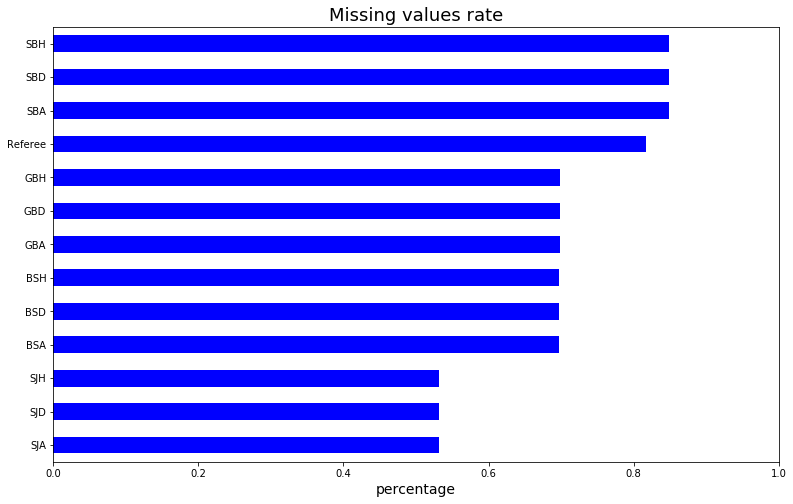

In [380]:
plt.figure(figsize = (13, 8))
null_data[null_data >= 0.3].sort_values().plot.barh(color = 'blue')
plt.xlim(xmax = 1)
plt.title("Missing values rate", fontsize = 18)
plt.xlabel("percentage", fontsize = 14)

In [381]:
features_no_null = null_data[null_data < 0.3].index
    
df_tmp = df_football[features_no_null].copy()
df_football = df_tmp.fillna(round(df_tmp.mean(), 2))

df_football.head()

,AC,AF,AR,AS,AST,AY,AwayTeam,B365A,B365D,B365H,BWA,BWD,BWH,BbAv<2.5,BbAv>2.5,BbAvA,BbAvD,BbAvH,BbMx<2.5,BbMx>2.5,BbMxA,BbMxD,BbMxH,Date,Div,FTAG,FTHG,FTR,HC,HF,HR,HS,HST,HTAG,HTHG,HTR,HY,HomeTeam,IWA,IWD,IWH,LBA,LBD,LBH,PSA,PSCA,PSCD,PSCH,PSD,PSH,VCA,VCD,VCH,WHA,WHD,WHH,FTTG
0,9.0,9.0,0.0,16.0,6.0,0.0,Malaga,3.2,3.25,2.25,3.25,3.40,2.25,1.78,2.02,3.15,3.26,2.28,1.83,2.12,3.45,3.44,2.40,2012-08-18,SP1,1.0,0.0,A,8.0,13.0,0.0,17.0,3.0,0.0,0.0,D,2.0,Celta,2.7,3.2,2.40,2.88,3.20,2.38,3.43,3.29,3.45,2.35,3.38,2.31,3.40,3.3,2.30,3.2,3.30,2.25,1.0
1,4.0,14.0,0.0,13.0,5.0,2.0,Espanol,3.8,3.30,2.00,4.10,3.30,2.00,1.68,2.17,3.78,3.36,2.00,1.72,2.30,4.25,3.57,2.10,2012-08-18,SP1,1.0,2.0,H,7.0,14.0,0.0,17.0,9.0,1.0,1.0,D,3.0,Mallorca,3.2,3.2,2.10,3.30,3.25,2.10,4.17,3.63,3.33,2.25,3.56,2.00,4.10,3.5,2.00,3.8,3.25,2.05,3.0
2,8.0,17.0,0.0,10.0,3.0,4.0,Getafe,5.5,3.75,1.62,5.50,3.75,1.60,1.84,1.96,5.33,3.72,1.65,1.92,2.04,6.00,4.08,1.70,2012-08-18,SP1,1.0,2.0,H,8.0,15.0,0.0,16.0,5.0,0.0,2.0,H,4.0,Sevilla,4.4,3.5,1.70,4.50,3.60,1.70,6.15,5.73,3.96,1.68,3.94,1.65,6.00,3.8,1.67,4.8,3.75,1.70,3.0
3,4.0,17.0,0.0,13.0,9.0,2.0,Betis,4.2,3.50,1.83,4.10,3.50,1.85,1.92,1.88,4.18,3.54,1.85,2.00,2.00,4.50,3.83,1.91,2012-08-19,SP1,5.0,3.0,A,11.0,12.0,0.0,17.0,8.0,3.0,0.0,A,2.0,Ath Bilbao,4.0,3.4,1.80,4.20,3.50,1.85,4.41,3.65,3.49,2.17,3.77,1.89,4.33,3.7,1.87,4.0,3.50,1.91,8.0
4,1.0,12.0,0.0,5.0,2.0,3.0,Sociedad,26.0,9.00,1.10,23.00,10.00,1.08,3.36,1.30,24.64,9.77,1.09,3.65,1.33,34.00,13.00,1.12,2012-08-19,SP1,1.0,5.0,H,9.0,9.0,0.0,18.0,10.0,1.0,4.0,H,2.0,Barcelona,14.0,7.0,1.12,17.00,8.00,1.11,31.00,35.36,13.96,1.09,12.00,1.10,31.00,12.0,1.10,29.0,11.00,1.07,6.0


In [382]:
ftr_dummies = pd.get_dummies(df_football.FTR, prefix='FTR')
df_football = pd.concat([df_football, ftr_dummies], axis = 1)

htr_dummies = pd.get_dummies(df_football.HTR, prefix='HTR')
df_football = pd.concat([df_football, htr_dummies], axis = 1)

df_football.head()

,AC,AF,AR,AS,AST,AY,AwayTeam,B365A,B365D,B365H,BWA,BWD,BWH,BbAv<2.5,BbAv>2.5,BbAvA,BbAvD,BbAvH,BbMx<2.5,BbMx>2.5,BbMxA,BbMxD,BbMxH,Date,Div,FTAG,FTHG,FTR,HC,HF,HR,HS,HST,HTAG,HTHG,HTR,HY,HomeTeam,IWA,IWD,IWH,LBA,LBD,LBH,PSA,PSCA,PSCD,PSCH,PSD,PSH,VCA,VCD,VCH,WHA,WHD,WHH,FTTG,FTR_A,FTR_D,FTR_H,HTR_A,HTR_D,HTR_H
0,9.0,9.0,0.0,16.0,6.0,0.0,Malaga,3.2,3.25,2.25,3.25,3.40,2.25,1.78,2.02,3.15,3.26,2.28,1.83,2.12,3.45,3.44,2.40,2012-08-18,SP1,1.0,0.0,A,8.0,13.0,0.0,17.0,3.0,0.0,0.0,D,2.0,Celta,2.7,3.2,2.40,2.88,3.20,2.38,3.43,3.29,3.45,2.35,3.38,2.31,3.40,3.3,2.30,3.2,3.30,2.25,1.0,1,0,0,0,1,0
1,4.0,14.0,0.0,13.0,5.0,2.0,Espanol,3.8,3.30,2.00,4.10,3.30,2.00,1.68,2.17,3.78,3.36,2.00,1.72,2.30,4.25,3.57,2.10,2012-08-18,SP1,1.0,2.0,H,7.0,14.0,0.0,17.0,9.0,1.0,1.0,D,3.0,Mallorca,3.2,3.2,2.10,3.30,3.25,2.10,4.17,3.63,3.33,2.25,3.56,2.00,4.10,3.5,2.00,3.8,3.25,2.05,3.0,0,0,1,0,1,0
2,8.0,17.0,0.0,10.0,3.0,4.0,Getafe,5.5,3.75,1.62,5.50,3.75,1.60,1.84,1.96,5.33,3.72,1.65,1.92,2.04,6.00,4.08,1.70,2012-08-18,SP1,1.0,2.0,H,8.0,15.0,0.0,16.0,5.0,0.0,2.0,H,4.0,Sevilla,4.4,3.5,1.70,4.50,3.60,1.70,6.15,5.73,3.96,1.68,3.94,1.65,6.00,3.8,1.67,4.8,3.75,1.70,3.0,0,0,1,0,0,1
3,4.0,17.0,0.0,13.0,9.0,2.0,Betis,4.2,3.50,1.83,4.10,3.50,1.85,1.92,1.88,4.18,3.54,1.85,2.00,2.00,4.50,3.83,1.91,2012-08-19,SP1,5.0,3.0,A,11.0,12.0,0.0,17.0,8.0,3.0,0.0,A,2.0,Ath Bilbao,4.0,3.4,1.80,4.20,3.50,1.85,4.41,3.65,3.49,2.17,3.77,1.89,4.33,3.7,1.87,4.0,3.50,1.91,8.0,1,0,0,1,0,0
4,1.0,12.0,0.0,5.0,2.0,3.0,Sociedad,26.0,9.00,1.10,23.00,10.00,1.08,3.36,1.30,24.64,9.77,1.09,3.65,1.33,34.00,13.00,1.12,2012-08-19,SP1,1.0,5.0,H,9.0,9.0,0.0,18.0,10.0,1.0,4.0,H,2.0,Barcelona,14.0,7.0,1.12,17.00,8.00,1.11,31.00,35.36,13.96,1.09,12.00,1.10,31.00,12.0,1.10,29.0,11.00,1.07,6.0,0,0,1,0,0,1


In [383]:
df_football.columns

Index(['AC', 'AF', 'AR', 'AS', 'AST', 'AY', 'AwayTeam', 'B365A', 'B365D',
       'B365H', 'BWA', 'BWD', 'BWH', 'BbAv<2.5', 'BbAv>2.5', 'BbAvA', 'BbAvD',
       'BbAvH', 'BbMx<2.5', 'BbMx>2.5', 'BbMxA', 'BbMxD', 'BbMxH', 'Date',
       'Div', 'FTAG', 'FTHG', 'FTR', 'HC', 'HF', 'HR', 'HS', 'HST', 'HTAG',
       'HTHG', 'HTR', 'HY', 'HomeTeam', 'IWA', 'IWD', 'IWH', 'LBA', 'LBD',
       'LBH', 'PSA', 'PSCA', 'PSCD', 'PSCH', 'PSD', 'PSH', 'VCA', 'VCD', 'VCH',
       'WHA', 'WHD', 'WHH', 'FTTG', 'FTR_A', 'FTR_D', 'FTR_H', 'HTR_A',
       'HTR_D', 'HTR_H'],
      dtype='object')

```python
features_to_predict = ['FTTG',
                       'FTHG', 'FTAG', 'FTR', 'FTR_A', 'FTR_D', 'FTR_H', 
                       'HTHG', 'HTAG', 'HTR', 'HTR_A', 'HTR_D', 'HTR_H', 
                       'HS', 'AS', 'HST', 'AST', 'HC', 'AC', 'HF', 
                       'AF', 'HY', 'AY', 'HR', 'AR']

features = ['B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA',
            'LBH', 'LBD', 'LBA', 'PSH', 'PSD', 'PSA', 'VCH', 'VCD', 'VCA',
            'WHH', 'WHD', 'WHA', 
            
            'BbMxH', 'BbMxD', 'BbMxA', 'BbAvH', 'BbAvD', 'BbAvA',
            
            'BbMx>2.5', 'BbAv>2.5', 'BbMx<2.5', 'BbAv<2.5', 
            
            'PSCH', 'PSCD', 'PSCA']
```

In [384]:
features = ['B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA',
            'LBH', 'LBD', 'LBA', 'PSH', 'PSD', 'PSA', 'VCH', 'VCD', 'VCA',
            'WHH', 'WHD', 'WHA', 
            
            'BbMxH', 'BbMxD', 'BbMxA', 'BbAvH', 'BbAvD', 'BbAvA',
            
            'BbMx>2.5', 'BbAv>2.5', 'BbMx<2.5', 'BbAv<2.5', 
            
            'PSCH', 'PSCD', 'PSCA']

In [385]:
df_football[features].describe()

,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,VCH,VCD,VCA,WHH,WHD,WHA,BbMxH,BbMxD,BbMxA,BbAvH,BbAvD,BbAvA,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,PSCH,PSCD,PSCA
count,13650.000000,13650.000000,13650.000000,13650.000000,13650.000000,13650.000000,13650.000000,13650.000000,13650.000000,13650.000000,13650.000000,13650.000000,13650.000000,13650.000000,13650.000000,13650.000000,13650.000000,13650.000000,13650.000000,13650.000000,13650.000000,13650.000000,13650.000000,13650.000000,13650.000000,13650.000000,13650.000000,13650.000000,13650.000000,13650.000000,13650.000000,13650.000000,13650.000000,13650.000000
mean,2.751829,3.963924,4.846712,2.697388,3.897228,4.649640,2.590316,3.748700,4.316916,2.683066,3.858955,4.703653,2.893116,4.183057,5.191153,2.828926,4.072564,5.160447,2.723906,3.756530,4.739089,2.966292,4.252210,5.580003,2.726716,3.911914,4.778252,2.033397,1.937070,2.063146,1.953995,2.900480,4.229907,5.294197
std,2.095498,1.379746,4.274482,1.946711,1.291486,3.925915,1.706881,1.012764,3.341094,1.956455,1.268677,4.285388,2.192181,1.564381,4.498601,2.266434,1.545260,5.103360,1.974464,1.169325,4.205677,2.531944,1.805362,6.069816,2.033769,1.327272,4.247075,0.335960,0.304001,0.505887,0.439544,2.210412,1.663376,4.852426
min,1.020000,1.730000,1.080000,1.030000,1.670000,1.090000,1.030000,1.600000,1.100000,1.040000,1.830000,1.060000,1.040000,2.200000,1.090000,1.030000,2.000000,1.080000,1.020000,1.020000,1.080000,1.050000,1.830000,1.100000,1.030000,1.750000,1.090000,1.130000,1.090000,1.410000,1.370000,1.040000,2.200000,1.080000
25%,1.670000,3.250000,2.500000,1.700000,3.250000,2.550000,1.700000,3.200000,2.500000,1.670000,3.250000,2.500000,1.820000,3.400000,2.820000,1.700000,3.300000,2.600000,1.730000,3.200000,2.600000,1.750000,3.400000,2.650000,1.690000,3.240000,2.520000,1.800000,1.720000,1.750000,1.670000,1.810000,3.390000,2.780000
50%,2.150000,3.500000,3.500000,2.150000,3.400000,3.450000,2.100000,3.400000,3.300000,2.150000,3.400000,3.400000,2.400000,3.745000,4.105000,2.200000,3.500000,3.600000,2.200000,3.300000,3.400000,2.250000,3.630000,3.770000,2.150000,3.430000,3.470000,2.040000,1.950000,1.930000,1.840000,2.420000,3.760000,4.120000
75%,2.880000,4.000000,5.250000,2.800000,4.000000,5.000000,2.650000,3.800000,4.700000,2.800000,4.000000,5.000000,2.890000,4.180000,5.190000,2.900000,4.200000,5.400000,2.800000,3.800000,5.000000,3.000000,4.310000,5.750000,2.840000,3.980000,5.140000,2.270000,2.160000,2.210000,2.100000,2.900000,4.230000,5.290000
max,26.000000,17.000000,51.000000,34.000000,19.500000,51.000000,20.000000,16.000000,42.000000,29.000000,19.000000,61.000000,36.000000,29.000000,48.750000,36.000000,26.000000,67.000000,26.000000,17.000000,51.000000,39.170000,33.000000,92.570000,29.080000,18.640000,42.740000,5.400000,3.040000,7.550000,6.750000,37.630000,26.600000,60.500000


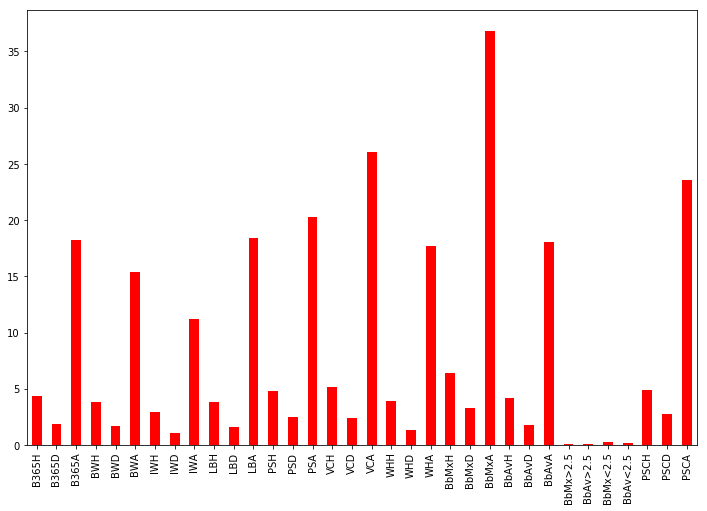

In [386]:
df_football[features].var().plot(kind='bar', color='r')

Text(0,0.5,'Percentaje')

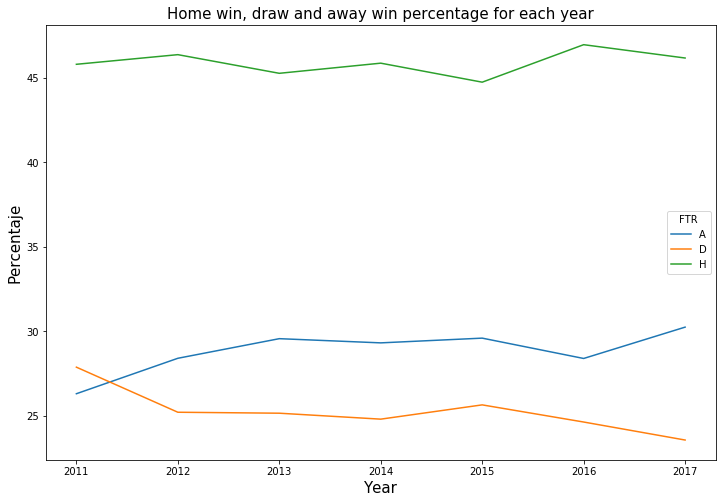

In [387]:
group = df_football.groupby([df_football.Date.dt.year, 'FTR']).size(). \
                    groupby(level = 0).transform(lambda x: (x/x.sum()) * 100)

group.unstack('FTR').plot()
plt.title('Home win, draw and away win percentage for each year', fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Percentaje', fontsize=15)

Text(0,0.5,'Goals')

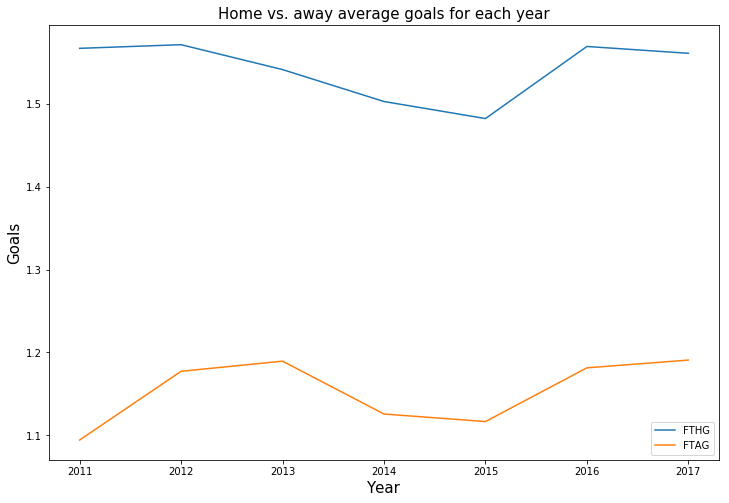

In [388]:
group = df_football.groupby([df_football.Date.dt.year])[['FTHG', 'FTAG']].mean()

group.plot()
plt.title('Home vs. away average goals for each year', fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Goals', fontsize=15)

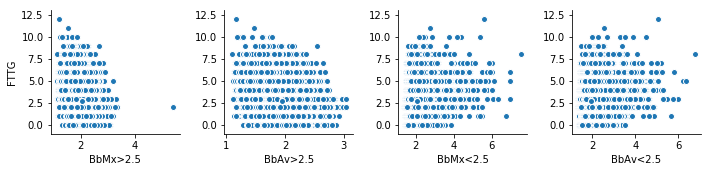

In [389]:
sns.pairplot(df_football, y_vars=['FTTG'], 
             x_vars=['BbMx>2.5', 'BbAv>2.5', 'BbMx<2.5', 'BbAv<2.5'])

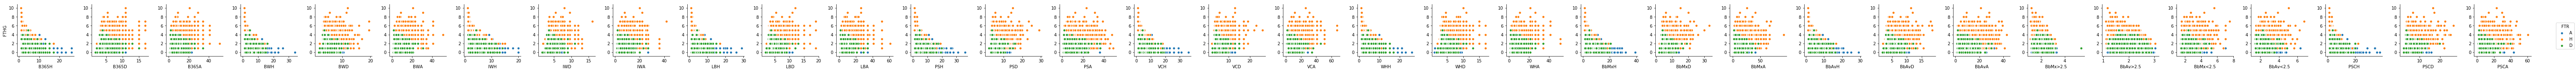

In [390]:
sns.pairplot(df_football, y_vars=['FTHG'], x_vars=features, hue="FTR")

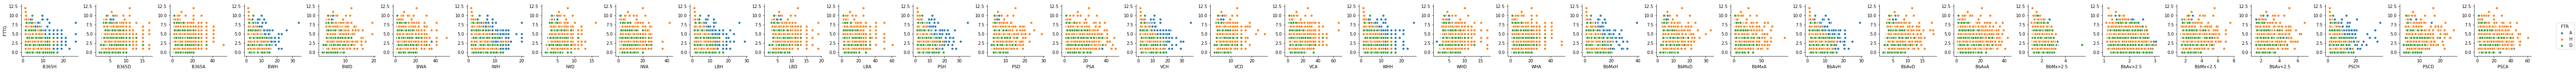

In [391]:
sns.pairplot(df_football, y_vars=['FTTG'], x_vars=features, hue="FTR")

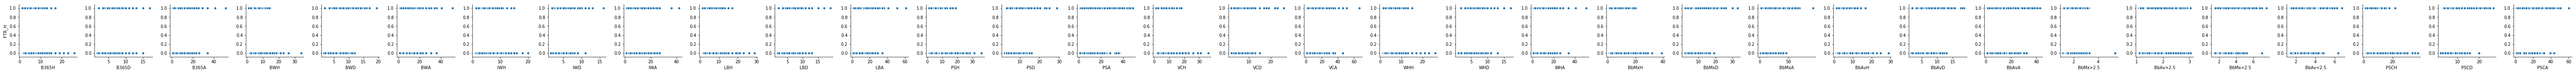

In [392]:
sns.pairplot(df_football, y_vars=['FTR_H'], x_vars=features)

In [429]:
features = ['B365H', 'BWH', 'IWH', 'LBH', 'PSH', 'VCH', 'WHH',
            'BbMxH', 'BbAvH', 'BbAvD', 'PSCH']

In [434]:
features = ['B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA',
            'LBH', 'LBD', 'LBA', 'PSH', 'PSD', 'PSA', 'VCH', 'VCD', 'VCA',
            'WHH', 'WHD', 'WHA', 
            
            'BbMxH', 'BbMxD', 'BbMxA', 'BbAvH', 'BbAvD', 'BbAvA', 
            
            'PSCH', 'PSCD', 'PSCA']

# Análisis de componentes principales

In [435]:
from sklearn.decomposition import PCA

In [436]:
df_pca = df_football[features].copy()

In [437]:
pca = PCA()
pca.fit_transform(df_pca)

print("Número de componentes: ", pca.n_components_)
print('\n')
print('Ratio de varianza: \n', pca.explained_variance_ratio_)
print('\n')
print('Ratio de varianza acumulada hasta explicar el 95%: \n', 
      pca.explained_variance_ratio_[pca.explained_variance_ratio_.cumsum() < 0.95].cumsum())

Número de componentes:  30


Ratio de varianza: 
 [  8.04196884e-01   1.44801943e-01   2.15480760e-02   5.01903674e-03
   4.23314540e-03   3.77188163e-03   3.19047438e-03   2.95103794e-03
   1.95811985e-03   1.65957979e-03   1.49970292e-03   1.42180252e-03
   5.17183307e-04   4.68013385e-04   4.22270879e-04   2.91267692e-04
   2.50718917e-04   2.36222863e-04   2.29406959e-04   2.04966642e-04
   1.79896606e-04   1.56133998e-04   1.45388203e-04   1.35327873e-04
   1.33759024e-04   1.20224333e-04   1.12268314e-04   9.44483328e-05
   2.67021457e-05   2.41167444e-05]


Ratio de varianza acumulada hasta explicar el 95%: 
 [ 0.80419688  0.94899883]


In [438]:
polynomial = PolynomialFeatures(2)
df_pca_poly = polynomial.fit_transform(df_pca)

pca_poly2 = PCA()
pca_poly2.fit_transform(df_pca_poly)

print("Número de componentes: ", pca_poly2.n_components_)
print('\n')
print('Ratio de varianza de los 10 primeros componentes: \n', 
      pca_poly2.explained_variance_ratio_[:10])
print('\n')
print('Ratio de varianza acumulada hasta explicar el 95%: \n', 
      pca_poly2.explained_variance_ratio_[pca_poly2.explained_variance_ratio_.cumsum() < 0.95].cumsum())

Número de componentes:  496


Ratio de varianza de los 10 primeros componentes: 
 [ 0.86481149  0.05735939  0.0257499   0.01113677  0.00999488  0.00688693
  0.00471882  0.0035393   0.00311881  0.00260277]


Ratio de varianza acumulada hasta explicar el 95%: 
 [ 0.86481149  0.92217088  0.94792078]


In [426]:
polynomial = PolynomialFeatures(3)
df_pca_poly = polynomial.fit_transform(df_pca)

pca_poly3 = PCA()
pca_poly3.fit_transform(df_pca_poly)

print("Número de componentes: ", pca_poly3.n_components_)
print('\n')
print('Ratio de varianza de los 10 primeros componentes: \n', 
      pca_poly3.explained_variance_ratio_[:10])
print('\n')
print('Ratio de varianza acumulada hasta explicar el 95%: \n', 
      pca_poly3.explained_variance_ratio_[pca_poly3.explained_variance_ratio_.cumsum() < 0.95].cumsum())

Número de componentes:  5456


Ratio de varianza de los 10 primeros componentes: 
 [ 0.86084231  0.03387692  0.02007218  0.01932386  0.01806746  0.01208322
  0.00781428  0.00555575  0.00487225  0.00392194]


Ratio de varianza acumulada hasta explicar el 95%: 
 [ 0.86084231  0.89471923  0.9147914   0.93411526]


# Separación de datos de entrenamiento y prueba

In [412]:
from sklearn.model_selection import train_test_split

In [413]:
df_y = df_football['FTHG'].copy()
df_X = df_football[features].copy()

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y,
                                                    test_size = 0.25, random_state = 42)

In [414]:
print("X_train: " + str(X_train.shape))
print("X_test:  " + str(X_test.shape))
print("y_train: " + str(y_train.shape))
print("y_test:  " + str(y_test.shape))

X_train: (10237, 30)
X_test:  (3413, 30)
y_train: (10237,)
y_test:  (3413,)


In [443]:
# PCA Train
polynomial = PolynomialFeatures(2)
X_train_poly = polynomial.fit_transform(X_train)

pca = PCA(3)
X_train = pca.fit_transform(X_train_poly)

# PCA Test
polynomial = PolynomialFeatures(2)
X_test_poly = polynomial.fit_transform(X_test)

pca = PCA(3)
X_test = pca.fit_transform(X_test_poly)

# Regresión lineal

In [402]:
from sklearn.linear_model import LinearRegression

### Regresión lineal básica

In [415]:
reg_LR = LinearRegression()
reg_LR_fit = reg_LR.fit(X_train, y_train)
y_pred_LR = reg_LR.predict(X_test)

In [416]:
print('Intercept: ', reg_LR.intercept_)
print('Coefficients:')
list(zip(df_X.columns, reg_LR.coef_))

Intercept:  0.708104958616
Coefficients:


[('B365H', 0.037994940183831177),
 ('B365D', 0.0039360360352799773),
 ('B365A', 0.04093937891376901),
 ('BWH', -0.027357081682376203),
 ('BWD', 0.070564932343535711),
 ('BWA', 0.034592747790140592),
 ('IWH', -0.071349633948428928),
 ('IWD', 0.0014012608997753637),
 ('IWA', -0.050080242524544794),
 ('LBH', -0.0068882575945609769),
 ('LBD', 0.10793460926081574),
 ('LBA', -0.035463023324391066),
 ('PSH', 0.039080268005264006),
 ('PSD', 0.0065714417256510721),
 ('PSA', -0.028386636206250249),
 ('VCH', -0.037310486055963384),
 ('VCD', 0.035026566512560198),
 ('VCA', 0.017053362672162523),
 ('WHH', 0.0085755593309336572),
 ('WHD', -0.090766006131967558),
 ('WHA', -0.0099862259645199149),
 ('BbMxH', 0.21450780528049554),
 ('BbMxD', -0.12478097656329377),
 ('BbMxA', -0.064311408076520526),
 ('BbAvH', -0.37104586808684459),
 ('BbAvD', 0.32765504523149946),
 ('BbAvA', 0.070917872356284578),
 ('PSCH', -0.074583677388176034),
 ('PSCD', 0.11588622933923791),
 ('PSCA', -0.011965512053350587)]

In [417]:
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred_LR))
print('Variance score: %.2f' % r2_score(y_test, y_pred_LR))

Mean squared error: 1.37
Variance score: 0.18


### Regresión lineal con variables polinomiales

In [420]:
## Pipeline steps
polynomial_step = ('poly', PolynomialFeatures())
scaler_step = ('scaler', StandardScaler())
reg_step = ('reg', LinearRegression(normalize=True))

## Sort steps in a list
steps = [polynomial_step, scaler_step, reg_step]

## Pipeline creation
pipe = Pipeline(steps)

tuned_parameters = {'poly__degree': [3]}
kfold = KFold(n_splits = 5)

gs_poly_reg = GridSearchCV(pipe, tuned_parameters, cv=kfold, n_jobs=-1)
gs_poly_reg.fit(X_train, y_train)

y_pred_poly_reg = gs_poly_reg.predict(X_test)

print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred_poly_reg))
print('Variance score: %.2f' % r2_score(y_test, y_pred_poly_reg))

Process ForkPoolWorker-207:
Process ForkPoolWorker-208:
Process ForkPoolWorker-206:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)


KeyboardInterrupt: 

In [ ]:
gs_poly_reg.best_params_

# Lasso

In [197]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [218]:
alphas = np.logspace(-4, -0.5, 30)
alphas

array([  1.00000000e-04,   1.32035178e-04,   1.74332882e-04,
         2.30180731e-04,   3.03919538e-04,   4.01280703e-04,
         5.29831691e-04,   6.99564216e-04,   9.23670857e-04,
         1.21957046e-03,   1.61026203e-03,   2.12611233e-03,
         2.80721620e-03,   3.70651291e-03,   4.89390092e-03,
         6.46167079e-03,   8.53167852e-03,   1.12648169e-02,
         1.48735211e-02,   1.96382800e-02,   2.59294380e-02,
         3.42359796e-02,   4.52035366e-02,   5.96845700e-02,
         7.88046282e-02,   1.04049831e-01,   1.37382380e-01,
         1.81393069e-01,   2.39502662e-01,   3.16227766e-01])

In [247]:
## Pipeline steps
polynomial_step = ('poly', PolynomialFeatures())
scaler_step = ('scaler', StandardScaler())
pca_step = ('pca', PCA())
lasso_step = ('lasso', Lasso(normalize=True))

## Sort steps in a list
steps = [polynomial_step, scaler_step, pca_step, lasso_step]

## Pipeline creation
pipe = Pipeline(steps)

tuned_parameters = {'poly__degree': [2, 3],
                    'pca__n_components': [2, 3, 4, 5],
                    'lasso__alpha': alphas}
kfold = KFold(n_splits = 5)

gs_poly_lasso = GridSearchCV(pipe, tuned_parameters, cv=kfold, n_jobs=-1)
gs_poly_lasso.fit(X_train, y_train)

y_pred_poly_lasso = gs_poly_lasso.predict(X_test)

print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred_poly_lasso))
print('Variance score: %.2f' % r2_score(y_test, y_pred_poly_lasso))

Mean squared error: 1.38
Variance score: 0.17


In [248]:
gs_poly_lasso.best_params_

{'alpha': 0.0001}

# Árboles de decisión

In [256]:
from sklearn.tree import DecisionTreeRegressor

### Árbol de decisión básico

In [264]:
reg_DT = DecisionTreeRegressor()
reg_DT.fit(X_train, y_train)
y_pred_reg_DT = reg_DT.predict(X_test)

print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred_reg_DT))
print('Variance score: %.2f' % r2_score(y_test, y_pred_reg_DT))

Mean squared error: 2.87
Variance score: -0.72


### Árbol de decisión con GridSearch

In [296]:
reg_DT_gscv = DecisionTreeRegressor()

params = {'max_depth': range(1, 10),
          'min_samples_split': range(2, 15, 2),
          'min_samples_leaf': range(30, 40, 2)}

kfold = KFold(n_splits = 5)

gs_reg_DT = GridSearchCV(reg_DT_gscv, param_grid=params, cv=kfold, n_jobs=-1)
gs_reg_DT.fit(X_train, y_train)

y_pred_reg_DT = gs_reg_DT.predict(X_test)

print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred_reg_DT))
print('Variance score: %.2f' % r2_score(y_test, y_pred_reg_DT))

Mean squared error: 1.38
Variance score: 0.17


In [297]:
gs_reg_DT.best_params_

{'max_depth': 4, 'min_samples_leaf': 36, 'min_samples_split': 2}

### Árbol de decisión con Polynomial features

In [298]:
## Pipeline steps
polynomial_step = ('poly', PolynomialFeatures())
scaler_step = ('scaler', StandardScaler())
pca_step = ('pca', PCA())
reg_DT_step = ('reg_DT', DecisionTreeRegressor())

## Sort steps in a list
steps = [polynomial_step, scaler_step, pca_step, reg_DT_step]

## Pipeline creation
pipe = Pipeline(steps)

tuned_parameters = {'poly__degree': [2, 3],
                    'pca__n_components': [2, 3, 4, 5],
                    'reg_DT__max_depth': range(1, 10),
                    'reg_DT__min_samples_split': range(2, 15, 2),
                    'reg_DT__min_samples_leaf': range(30, 40, 2)}

kfold = KFold(n_splits = 3)

gs_poly_reg_DT = GridSearchCV(pipe, tuned_parameters, cv=kfold, n_jobs=-1)
gs_poly_reg_DT.fit(X_train, y_train)

y_pred_poly_reg_DT = gs_poly_reg_DT.predict(X_test)

print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred_poly_reg_DT))
print('Variance score: %.2f' % r2_score(y_test, y_pred_poly_reg_DT))

Mean squared error: 1.38
Variance score: 0.17


In [299]:
gs_poly_reg_DT.best_params_

{'poly__degree': 2,
 'reg_DT__max_depth': 3,
 'reg_DT__min_samples_leaf': 30,
 'reg_DT__min_samples_split': 2}

# Bagging

In [303]:
from sklearn.ensemble import BaggingRegressor

In [310]:
## Pipeline steps
polynomial_step = ('poly', PolynomialFeatures())
scaler_step = ('scaler', StandardScaler())
pca_step = ('pca', PCA())
bag_reg_DT_step = ('bag_reg_DT', BaggingRegressor(DecisionTreeRegressor()))

## Sort steps in a list
steps = [polynomial_step, scaler_step, pca_step, bag_reg_DT_step]

## Pipeline creation
pipe = Pipeline(steps)

tuned_parameters = {'poly__degree': [2, 3],
                    'pca__n_components': [2, 3, 4, 5],
                    'bag_reg_DT__n_estimators': range(40, 70, 10)}

kfold = KFold(n_splits = 3)

gs_poly_bag_reg_DT = GridSearchCV(pipe, tuned_parameters, cv=kfold, n_jobs=-1)
gs_poly_bag_reg_DT.fit(X_train, y_train)

y_pred_poly_bag_reg_DT = gs_poly_bag_reg_DT.predict(X_test)

print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred_poly_bag_reg_DT))
print('Variance score: %.2f' % r2_score(y_test, y_pred_poly_bag_reg_DT))

Mean squared error: 1.45
Variance score: 0.13


In [311]:
gs_poly_bag_reg_DT.best_params_

{'bag_reg_DT__n_estimators': 60, 'poly__degree': 3}

# Test

In [323]:
from sklearn.decomposition import PCA

In [324]:
## Pipeline steps
polynomial = PolynomialFeatures(2)
X_train_poly = polynomial.fit_transform(X_train)
X_test_poly = polynomial.fit_transform(X_test)

scaler = StandardScaler()
X_train_poly_scaled = scaler.fit_transform(X_train_poly)
X_test_poly_scaled = scaler.fit_transform(X_test_poly)

pca = PCA()
X_train_poly_scaled_pca = pca.fit_transform(X_train_poly_scaled)
num_comp_95 = pca.explained_variance_ratio_[pca.explained_variance_ratio_.cumsum() < 0.95].shape[0]
pca = PCA(num_comp_95)
X_train_final = pca.fit_transform(X_train_poly_scaled)

pca = PCA()
X_test_poly_scaled_pca = pca.fit_transform(X_test_poly_scaled)
num_comp_95 = pca.explained_variance_ratio_[pca.explained_variance_ratio_.cumsum() < 0.95].shape[0]
pca = PCA(num_comp_95)
X_test_final = pca.fit_transform(X_test_poly_scaled)

dt = DecisionTreeRegressor(max_depth=3, min_samples_leaf=30, min_samples_split=2)
dt.fit(X_train_final, y_train)
y_pred_dt = dt.predict(X_test_final)

print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred_dt))
print('Variance score: %.2f' % r2_score(y_test, y_pred_dt))

Mean squared error: 1.39
Variance score: 0.17


In [326]:
from sklearn import tree
tree.export_graphviz(dt, out_file='tree.dot')   

In [333]:
pca = PCA()
X_train_poly_scaled_pca = pca.fit_transform(X_train_poly_scaled)

pca.explained_variance_ratio_.cumsum()

array([ 0.91327293,  0.94411368,  0.96736766,  0.98116455,  0.98489149,
        0.98819973,  0.99106426,  0.99365422,  0.99543419,  0.99670754,
        0.99751296,  0.99821665,  0.99878251,  0.99916128,  0.99935653,
        0.99945824,  0.9995396 ,  0.99960276,  0.99965903,  0.99970972,
        0.99975027,  0.99978485,  0.9998161 ,  0.99983685,  0.9998547 ,
        0.9998718 ,  0.999886  ,  0.99989799,  0.99990865,  0.99991911,
        0.9999285 ,  0.99993668,  0.99994445,  0.99995141,  0.99995651,
        0.99996081,  0.99996468,  0.99996797,  0.99997095,  0.99997365,
        0.99997616,  0.99997836,  0.99998042,  0.9999822 ,  0.99998376,
        0.99998513,  0.99998642,  0.9999876 ,  0.99998869,  0.99998974,
        0.99999072,  0.99999158,  0.9999924 ,  0.99999319,  0.99999396,
        0.99999465,  0.9999953 ,  0.99999586,  0.99999639,  0.99999687,
        0.9999973 ,  0.99999773,  0.99999809,  0.99999842,  0.99999872,
        0.99999896,  0.99999916,  0.99999933,  0.99999949,  0.99